<a href="https://colab.research.google.com/github/Naomiweinberger/Hate-Speech/blob/main/EDAipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Notebook #1-EDA** 

**WARNING-DUE TO THE NATURE OF THIS PROJECT,THIS NOTEBOOK CONTAINS WORDS THAT ARE HATEFUL. THIS IS NO WAY REFLECTS THE VIEWS OF THE AUTHOR**

This notebook will focus on the EDA for the dataset.I started by importing the necessary libraries for this project. I imported NLTK and re to clean, tokenize and lemmatize the texts. I imported worldcloud to print out world clouds of each class. 

**Import libraries**

In [1]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stopword=set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, FreqDist
stemmer = nltk.SnowballStemmer("english")
from nltk.tokenize import TweetTokenizer

nltk.download('wordnet')
from nltk import ngrams, FreqDist
nltk.download('punkt')
import string
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud, STOPWORDS
from collections import Counter


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\weinb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\weinb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\weinb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Data**

For this project I synthesized two datasets. The first one had a collection of tweets that were labeled either hate_speech,offensive_language or neither. I joined that to a dataset that labeld tweets as sexist/racist or neither. I made the column names match (and matched up the class names) and then used pd.concat to join the datasets. 

In [2]:
hatespeech_df = pd.read_csv('C:\\Users\\weinb\\Hate-speech\\Data\\labeleddata.csv')
hatespeech_df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
hatespeech_df2=pd.read_csv('C:\\Users\\weinb\\Hate-speech\\Data\\train_E6oV3lV.csv')
hatespeech_df2.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
hatespeech_df_1=hatespeech_df[['class','tweet']]

In [5]:
hatespeech_df2['class']=hatespeech_df2['label']

In [6]:
hatespeech_df2['class'] = hatespeech_df2['class'].replace(['0'],'2')

In [7]:
df_2 = pd.DataFrame(hatespeech_df2, columns= ['class','tweet'])
df_2['class'] = df_2['class'].replace([1,0],[0,2])

In [8]:
hatespeech=pd.concat([hatespeech_df_1, df_2])
hatespeech.shape

(56745, 2)

I then plotted a bar graph to show the amount of tweets in each class. 0= Hate speech, 1= Offensive Language 2= Normal language

C:\Users\weinb\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

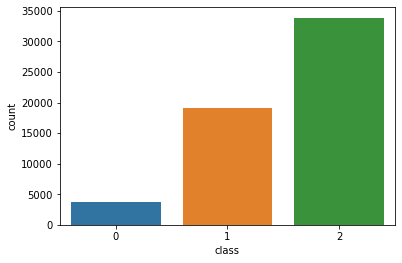

In [9]:
sns.countplot('class',data=hatespeech)

**Clean Text/Tokenike Test** I created a function to clean the tweets by remoting punctuation, retweets, links, capitolization and numbers. 

In [10]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub("@[A-Za-z0-9_]+", " ", text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\w\s]', '', (text))
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

I then created a class to tokenize and lemmatize the tweets. 

In [11]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()
def lemmatize_text(text):
 return [(lemmatizer.lemmatize(w)) for w in \
                                     w_tokenizer.tokenize((text))]

For each of the three classes I cleaned the tweets, created word clouds and plotted the word frequencies. 

**Hate Speech**

In [12]:
Hate = hatespeech.loc[lambda x: x['class'] == 0]
Hate_tweets=Hate['tweet'].apply(clean_text)

In [13]:
Hate.head()

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."


In [14]:
stopwords = set(STOPWORDS)
hatetext = " ".join(hatetext for hatetext in Hate.tweet)
wordcloud = WordCloud(stopwords=stopwords).generate(hatetext)

In [15]:
stop_words=set(stopwords)
new_stopwords=['b','dtype','a','i',',@white_thunduh','@WhaleLookyHere','@VigxRArts','@NoChillPaz','@MarkRoundtreeJr','@HowdyDowdy1','@DevilGrimz','@CB_Baby24','@CB_Baby24',':','name','youu',"you's",'tweet','tellin','really','Length','@viva_based','@mleew17','@UrKindOfBrand','@T_Madison_x',
              '@ShenikaRoberts', '@LifeAsKing','@C_G_Anderson','!','20',',','.','..','...','...\n...','0sbaby','1','19190','2','24774','24775','24778','24780','24781','3','4','5',':','?','@2','@8','@C_G_Anderson', 
              '@LifeAsKing','@ShenikaRoberts','@T_Madison_x','@UrKindOfBrand','@mleew17','@viva_based','110','202','type','dia','Name','1430', 'object','24777','@Blackman38Tide','@white_thunduh','I','hope','24776','24751','184','PEOPL','At','biggest','know',"I'm",'"','...\n   ...','24685','24576',
               '*', 'Dawg', 'RT', '“','need', 'lo', 'The', 'ain', 'young', 'bout', 'dwn', "'",'-','/','0','24736', '24737','24767','24779','24782','40','4163', '63', '66', '67',':/','@Addicted2Guys','@AllAboutManFeet','@Allyhaaaaa', '@N_tel','@ViVaLa_Ari','@mayasolovely', 'http://t.co/3gzUpfuMev', 's', 'th', 'tho', '~', '|',
               '&', 'As', 'Eileen', 'Dahlia', 'SimplyAddictedToGuys','yaya','avi','User','co','ð',"@user"]
new_stopwords_list = stop_words.union(new_stopwords)

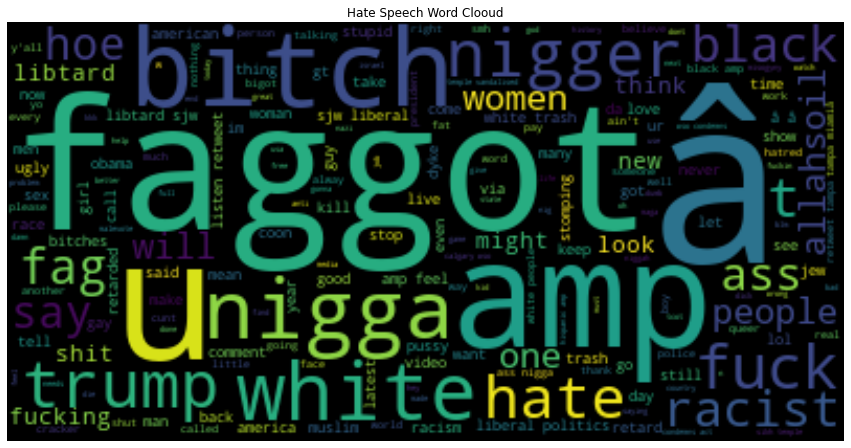

In [16]:
# visualize the image
wordcloud_h = WordCloud(stopwords=new_stopwords_list).generate(hatetext)
 # visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud_h, interpolation='bilinear')
plt.axis("off")
plt.title('Hate Speech Word Clooud')
plt.show()

In [17]:
lt_hate=lemmatize_text(str(Hate['tweet']))

In [18]:
fdist_hate = FreqDist(lt_hate)

In [19]:
hate_2=[]
for word in lt_hate: 
    if word not in new_stopwords_list:
        hate_2.append(word)

In [20]:
freq_hate=FreqDist(hate_2)
freq_hate

FreqDist({'85': 1, '89': 1, 'alsarabsss': 1, 'fucking': 1, 'gay': 1, 'LMFAOOOO': 1, 'HATE': 1, 'BLACK': 1, 'least': 1, 'nigger': 1, ...})

In [21]:
freq_hate.plot

<bound method FreqDist.plot of FreqDist({'85': 1, '89': 1, 'alsarabsss': 1, 'fucking': 1, 'gay': 1, 'LMFAOOOO': 1, 'HATE': 1, 'BLACK': 1, 'least': 1, 'nigger': 1, ...})>

In [37]:
hate_freq = pd.Series(freq_hate)

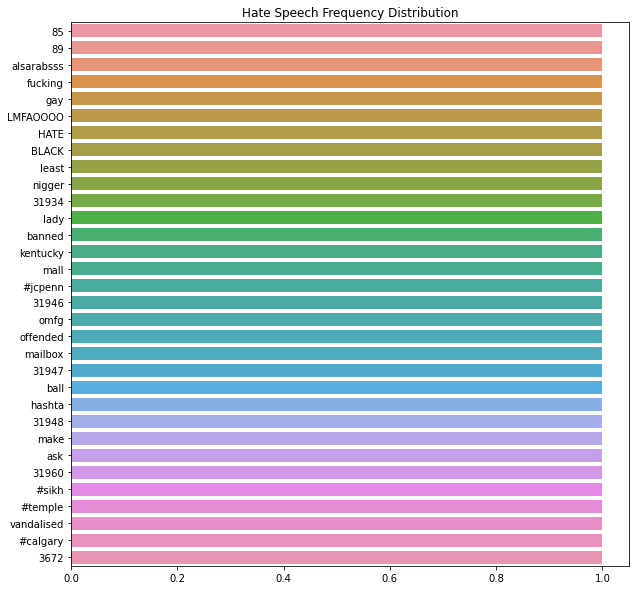

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
bar_plot = sns.barplot(x=hate_freq.values, y=hate_freq.index, orient='h', ax=ax)
plt.title('Hate Speech Frequency Distribution')
plt.show();

In [22]:
word_count_hate=Counter(hate_2)
print(word_count_hate.most_common(500))

[('85', 1), ('89', 1), ('alsarabsss', 1), ('fucking', 1), ('gay', 1), ('LMFAOOOO', 1), ('HATE', 1), ('BLACK', 1), ('least', 1), ('nigger', 1), ('31934', 1), ('lady', 1), ('banned', 1), ('kentucky', 1), ('mall', 1), ('#jcpenn', 1), ('31946', 1), ('omfg', 1), ('offended', 1), ('mailbox', 1), ('31947', 1), ('ball', 1), ('hashta', 1), ('31948', 1), ('make', 1), ('ask', 1), ('31960', 1), ('#sikh', 1), ('#temple', 1), ('vandalised', 1), ('#calgary', 1), ('3672', 1)]


**Offensive Language**

In [23]:
Offensive= hatespeech.loc[lambda x: x['class'] == 1]
Offensive_tweets=Offensive['tweet'].apply(clean_text)


In [24]:
Offensive.iloc[[450]]['tweet']

538    "On top of that, she just a pregnant ass sorry...
Name: tweet, dtype: object

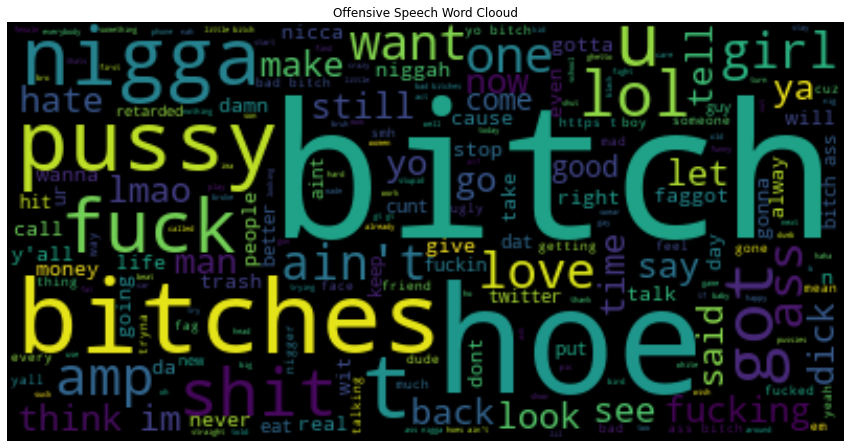

In [25]:
offensivetext = " ".join(offensivetext for offensivetext in Offensive.tweet)

 
# visualize the image
wordcloud_o = WordCloud(stopwords=new_stopwords_list).generate(offensivetext)
 
# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud_o, interpolation='bilinear')
plt.axis("off")
plt.title('Offensive Speech Word Clooud')
plt.show()

In [26]:
lt_offensive=lemmatize_text(str(Offensive['tweet']))

In [27]:
fdist_offensive = FreqDist(lt_offensive)


In [28]:
offensive_2=[]
for word in lt_offensive: 
    if word not in new_stopwords_list:
        offensive_2.append(word)

In [29]:
freq_offensive=FreqDist(offensive_2)


In [40]:
offensive_freq = pd.Series(freq_offensive)


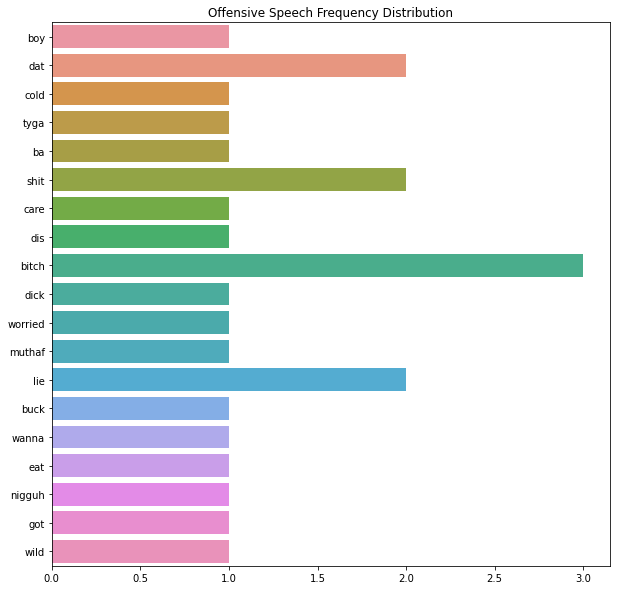

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
bar_plot = sns.barplot(x=offensive_freq.values, y=offensive_freq.index, orient='h', ax=ax)
plt.title('Offensive Speech Frequency Distribution')
plt.show();

**Normal Language**

In [31]:
Normal=hatespeech.loc[lambda x: x['class'] == 2]


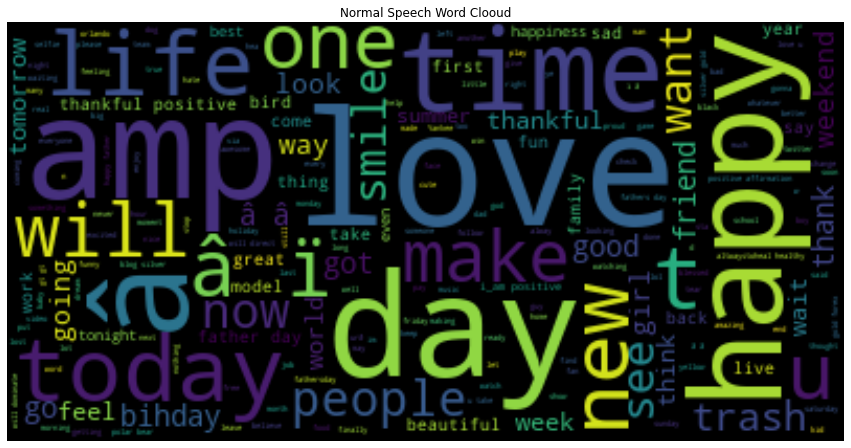

In [32]:
normaltext = " ".join(normaltext for normaltext in Normal.tweet)
wordcloud_o = WordCloud(stopwords=new_stopwords_list).generate(normaltext)
 

# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud_o, interpolation='bilinear')
plt.axis("off")
plt.title('Normal Speech Word Clooud')
plt.show()

In [33]:
lt_Normal=lemmatize_text(str(Normal['tweet']))

In [34]:
Normal_2=[]
for word in lt_Normal: 
    if word not in new_stopwords_list:
        Normal_2.append(word)

In [35]:
freq_normal=FreqDist(Normal_2)
freq_normal

FreqDist({'\x9f': 5, '\x98': 5, '\x8d': 5, 'woman': 1, 'momma': 1, 'said': 1, 'pussy': 1, 'cat': 1, 'inside': 1, 'doghouse': 1, ...})

In [42]:
normal_freq = pd.Series(freq_normal)


C:\Users\weinb\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\weinb\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\weinb\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\weinb\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\weinb\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\weinb\anaconda3\envs\learn-env\lib\site-packages\matplo

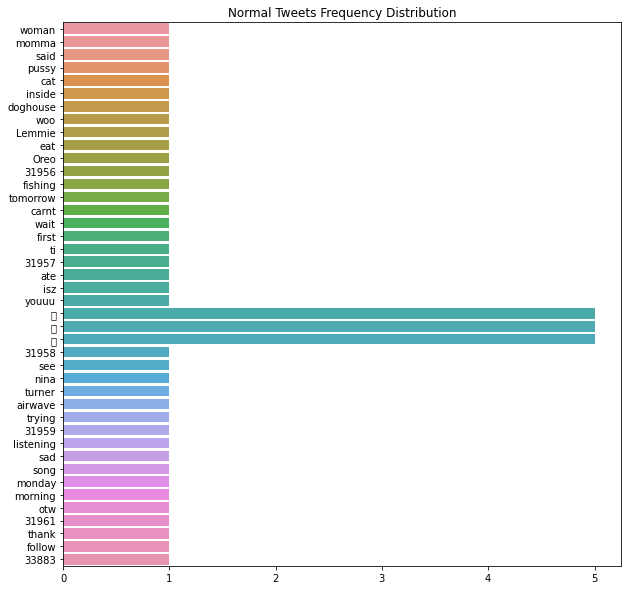

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
bar_plot = sns.barplot(x=normal_freq.values, y=normal_freq.index, orient='h', ax=ax)
plt.title('Normal Tweets Frequency Distribution')
plt.show();

I used some frequent words from each class to create a validation set. I scraped twitter using tweepy and twitter's API and used the frequent words as keywords to search for. I then tested my best performing models on the validation set. See [Notebook #2](http://localhost:8889/notebooks/Notebooks/Notebook_2_Scraping_Twitter.ipynb) for details of how I scraped twitter.